# Day 9: Text Processing and Data Sample Clustering
https://github.com/Make-School-Courses/DS-2.1-Machine-Learning/blob/master/Notebooks/remote_simple_kmeans.ipynb

## Learning Outcomes
1. Transform text data into numerical vectors
2. Group or cluster the data samples we have

### By the end of class you'll be able to
- Define Bag-of-Words
- Writie K-means to group text data

## Text Vectorization
- The process to transform text data to numerical vectors

### Why do we need text vectorization?
Think back to when we learned about **Label Encoding** and **One-Hot Encoding**: We took categories (text) and transformed them into numerical values.

Text vectorization is similar in that we are taking text and turning it into something a machine can understand and manipulate by translating a word in to a unique vector of numbers. For example, we could associate the unique vector (0, 1, 0, 1) to the word queen.

**Question: What are some other use cases for text vectorization?**

### Use Cases for Text Vectorization
- Count the number of unique words in each sentence (Bag-of-Words, we'll discuss this shortly!)
- Assign weights to each word in the sentence.
- Map each word to a number (dictionary with words as key and numbers as values) and represent each sentences as the sequence of numbers

## Bag-of-Words Matrix
- Bag-of-Words (BoW) is a matrix where its rows are sentences and its columns are unique words seen across all of the sentences

### BoW Example
We have the following 4 sentences:

1. This is the first sentence.
2. This one is the second sentence.
3. And this is the third one.
4. Is this the first sentence?

Question: Given the above sentances, how many unique words are there?

A BoW matrix would look like the following, where 0 means the word does not appear in the sentence, and 1 means the word does appear in the sentence

<img src="../static/screenshots/day9-1.png">

### BoW Worksheet (7 min)
**Complete the following worksheet on your own:**

- Copy [this blank table](https://docs.google.com/presentation/d/1B7v33fPEwblhHYBCSrCvKRBZz776Df4T_t2jcPXt4k8/edit#slide=id.g74c1153bdd_0_15), and create the BoW matrix for the following sentences:
1. Data Science is the best.
2. Data Science has cool topics.
3. Are these the best topics?
4. Is Data Science the best track?

## BoW in Sklearn
We can write a function to return a BoW matrix

Below, we will see how we can build a BoW matrix by calling [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html?highlight=countvectorizer#sklearn-feature-extraction-text-countvectorizer) in sklearn

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sentences = ['This is the first sentence.',
             'This one is the second sentence.',
             'And this is the third one.',
             'Is this the first sentence?']

In [8]:
vectorizer = CountVectorizer()
# create a term-document matrix: assign each word a tuple: 
# first number is the sentence, and the second is the unique number that corresponds to the word
# for example, if the word "one" is assigned the number 3,
# then the word "one" that is used in the third sentence is represented by the tuple (2,3)
X = vectorizer.fit_transform(sentences)

# from the term-document matrix, create the BoW matrix
print(X.toarray())

[[0 1 1 0 0 1 1 0 1]
 [0 0 1 1 1 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 0 1 1 0 1]]


## How do we get unique words?

In [9]:
# Get the unique words
print(vectorizer.get_feature_names())

['and', 'first', 'is', 'one', 'second', 'sentence', 'the', 'third', 'this']


### Activity: Worksheet --> sklearn (7 min)
Use sklearn to take the 4 sentences you used in the worksheet and create the BoW matrix using sklearn

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sentences = ["Data Science is the best.", "Data Science has cool topics.", 
             "Are these the best topics?", "Is Data Science the best track?"]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences)
# from the term-document matrix, create the BoW matrix
print(X.toarray())
print(vectorizer.get_feature_names())

[[0 1 0 1 0 1 1 1 0 0 0]
 [0 0 1 1 1 0 1 0 0 1 0]
 [1 1 0 0 0 0 0 1 1 1 0]
 [0 1 0 1 0 1 1 1 0 0 1]]
['are', 'best', 'cool', 'data', 'has', 'is', 'science', 'the', 'these', 'topics', 'track']


## Clustering
- Clustering is an unsupervised learning method. A cluster is a **group of data points that are grouped together due to similarities in their features**
- This is very often used because we usually **don’t have labeled data**
- K-Means clustering is a popular clustering algorithms: it **finds a fixed number (k) of clusters in a set of data.**
- The goal of any cluster algorithm is to **find groups (clusters) in the given data**

### Question: What are some use cases of clustering?
Examples of Clustering
- Cluster movie dataset -> We expect the movies which their genres are similar be clustered in the same group
- News Article Clustering -> We want the News related to science be in the same group, News related to sport be in the same group

## Demo of K-means

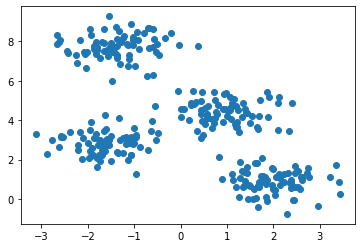

In [11]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

# create a sample dataset with 300 data points and 4 cluster centers
X, y = make_blobs(n_samples=300, centers=4,
                          random_state=0, cluster_std=0.60)

# plot the data
plt.scatter(X[:, 0], X[:, 1])

In [12]:
# from figures import plot_kmeans_interactive

# plot_kmeans_interactive()

### Question: How many samples we have at each cluster?

In [13]:
from sklearn.cluster import KMeans

# k-means algorithm where k = 4
km = KMeans(n_clusters=4)
# perform k-means clustering on the previous dataset
km.fit(X)
# print the 4 cluster centers
print(km.cluster_centers_)

[[-1.58438467  2.83081263]
 [-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]]


### Answer:

In [14]:
import pandas as pd

print(km.predict(X))

#then obtain the histogram of the above list
dict(pd.Series(km.predict(X)).value_counts())

[2 1 3 1 2 2 0 3 1 1 0 1 3 1 2 3 3 2 0 0 2 2 3 0 0 3 2 3 0 3 1 1 3 1 1 1 1
 1 0 2 3 0 3 3 0 0 1 0 1 2 0 2 1 2 2 0 1 0 1 2 1 3 1 0 0 0 1 2 1 0 3 0 1 0
 0 1 0 3 2 1 2 3 2 2 1 3 2 3 1 1 3 2 1 0 0 3 2 2 3 0 1 2 1 2 3 2 2 3 1 3 0
 0 2 1 2 3 1 2 2 3 0 2 0 2 2 2 2 0 2 0 1 0 0 2 1 0 0 1 3 1 1 0 3 0 3 0 1 3
 1 1 1 3 1 3 2 0 1 0 2 3 1 3 3 2 3 0 0 3 2 3 3 1 2 3 0 1 2 2 3 0 2 3 0 0 3
 3 3 3 2 1 3 0 3 3 0 0 0 3 0 1 3 0 2 0 3 1 0 1 3 1 3 0 3 3 1 0 0 2 2 3 1 2
 2 0 2 0 3 1 1 3 3 1 3 2 0 3 2 0 1 0 2 3 2 1 1 1 1 0 0 1 3 0 2 3 0 0 0 2 2
 1 3 3 0 2 1 0 3 1 3 2 2 0 0 3 2 2 2 3 1 1 2 2 3 2 2 2 1 0 1 3 2 2 1 1 1 2
 2 3 1 0]


{3: 75, 2: 75, 1: 75, 0: 75}

## How to choose the optimal number (K) of clusters?
- We could always choose a high number, but we may be wasting a lot of time and resources when a smaller number would give us the same results. How do we know the best K to pick so that we are running k-means as efficiently as possible?

#### Possible (min and max cluster)
- k=1 (one big cluster)-> minimum number of cluster
- k=300 (number of samples) -> the maximum number of cluster


## The Elbow Method
We can find the optimal K by utilizing the **Elbow Method**: a method that **assigns a score to each K**. When we plot these scores, we will get a line that looks like an arm bending at the elbow. The **K value that is closest to the "elbow" point of the graph is our optimal K**

Scores can be calculated two different ways:
1. **Distortion**: the average of the squared distances from each sample to its closest cluster center. Typically, the Euclidean distance metric is used. The lower the distortion, the better the score
    - For numberes 1 to k, compute the following:
        - Euclidean squared distance formula: $\sum_{j=1}^{k} (a_j-b_j)^2$
        - For each sample, find the squared distance between the sample and all k cluster centers, and then pick the closest center (shortest distance)
        - Take the average of the above
2. Inertia: the sum of squared distances of samples to their closest cluster center. The lower the inertia, the better the score
    - We'll use the same Euclidean squared distance formula for here as well.

Either scoring method is valid, and will give you the same optimal K value. Below we will look at how to implement both scoring methods:

## Distortion

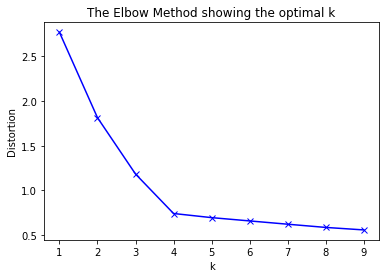

In [15]:
import numpy as np
from scipy.spatial import distance

distortions = []
K = range(1, 10)
for k in K:
    # fit the k-means for a given k to the data (X)
    km = KMeans(n_clusters=k)
    km.fit(X)
    # distance.cdist finds the squared distances
    # axis=1 allows us to keep the min for each sample, not jsut the min across the entire dataset
    # find the closest distance for each sample to a center, and take the average
    distortions.append(sum(np.min(distance.cdist(X, km.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow: bx- = use a solid (-) blue (b) line, 
# and mark the x-axis points with an x (x)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Intertia

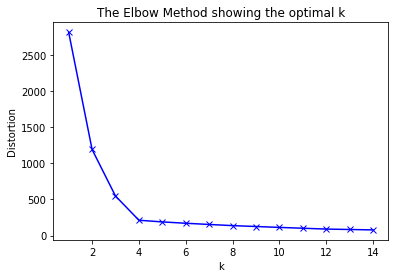

In [16]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X)
    # inertia is an attribute of km!
    # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
    sum_of_squared_distances.append(km.inertia_)
    

    # Plot the elbow
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Activity - Elbow Method (7 min)¶
Using the starter code below, prove that 6 is the optimal K for clustering the data using k-means using the elbow method. You can use either Distortion or Inertia.

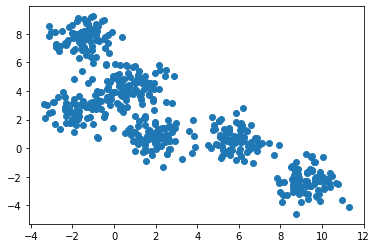

In [17]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

Data, blob_y = make_blobs(n_samples=500, centers=6,
                          random_state=0, cluster_std=0.80)

# plot the data
plt.scatter(Data[:, 0], Data[:, 1])

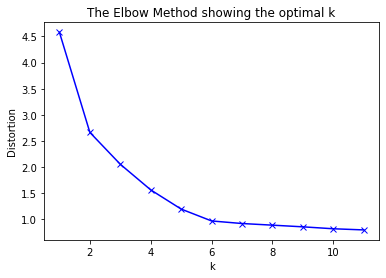

In [18]:
import numpy as np
from scipy.spatial import distance

def get_k_distortion(data, max_range):
    distortions = []
    K = range(1, max_range)
    for k in K:
        km = KMeans(n_clusters=k)
        km.fit(data)
        distortions.append(sum(np.min(distance.cdist(data, km.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
    
    
get_k_distortion(Data, 12)

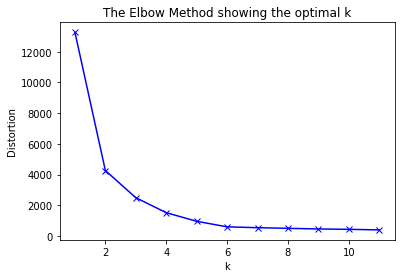

In [19]:
import numpy as np
from scipy.spatial import distance

def get_k_intertia(data, max_range):
    sum_of_squared_distances = []
    K = range(1,max_range)
    for k in K:
        km = KMeans(n_clusters=k)
        km.fit(data)
        sum_of_squared_distances.append(km.inertia_)

    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

get_k_intertia(Data, 12)

## Activity: Combine Text Vectorization and Clustering the Texts (30 min)
**Complete the activity below in groups of 3**

- We want to cluster the given sentences
- To do this: We want to use both concepts we learned today:
    - Vectorize the sentences (text-vectorization)
    - Apply Kmeans to cluster our vectorized sentences
- **Note**: We want to remove stop words from our sentences (and, or, is, etc.). To do this, we add stop_words='english' to our call to CountVectorize
- **Hint**: Look at the sentences in the starter code. How would you cluster the data if you were doing the clustering? Use that number as your K to start with.

#### My Solution - Do not use LOL

In [54]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import pandas as pd

sentences = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

def vectorize_sentences(sentences, clusters):
    # 1. Vectorize the sentences by BOW
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(sentences)
    
    # 2. Cluster 2- Cluster the vectorized sentences in 2 groups by K-Means
    km = KMeans(n_clusters = clusters)
    km.fit(X)
#     print(km.cluster_centers_)
#     print(km.predict(X))

    # 3. Obtain which group the S1 will be mapped
    # print(dict(pd.Series(km.predict(X)).value_counts())) #then obtain the histogram of the above list    
    
    # 4. Do step 3 for all S1 … S8
    for sentence in sentences:
        y= vectorizer.transform([sentence])
        prediction = km.predict(y)
        print(prediction)    
    
    
vectorize_sentences(sentences, 2)

[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]


### Milad's Solution

In [62]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sentences = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

def vectorize_sentences_solution(sentences):
    # remove stop words from sentences (and, or, is, ...) and instantiate the Bag-of-Word 
    vectorizer = CountVectorizer(stop_words='english') # Highly recommend to always do this stop_words='english' = remove stop words in English
    # transform sentences into numerical arrays 
    X = vectorizer.fit_transform(sentences) # transform to BOW matrix
    # print unique words (vocabulary)
    print(vectorizer.get_feature_names())
    print(X.shape)
    
    # We know there are two group of sentences -> Group 1: cats | Group 2: Google
    true_k = 2
    model = KMeans(n_clusters=true_k, init='k-means++') # init='k-means++' not an important parameter
    model.fit(X)

    # Testing our model: For a new sentence, let's see how the model will cluster it. 

    # first we should convert the sentence to a numerical array
    Y = vectorizer.transform(["chrome browser to open."]) # vector the represent these sentences
    print('Y:')
    print(Y.toarray()) # all words will be 0, but Cat and Google will be 1
    prediction = model.predict(Y)
    print("Y Sentences Prediction", prediction)
    # Let's do the same for another sentence
    Y = vectorizer.transform(["My cat is hungry."])
    prediction = model.predict(Y)
    print(prediction)
    # Lets see the model prediction for training docs
    print("Sentences Prediction", model.predict(X))
    
vectorize_sentences_solution(sentences)

['100', 'app', 'belly', 'best', 'came', 'cat', 'chrome', 'climbing', 'eating', 'extension', 'face', 'feedback', 'google', 'impressed', 'incredible', 'key', 'kitten', 'kitty', 'little', 'map', 'merley', 'ninja', 'open', 'photo', 'play', 'promoter', 'restaurant', 'smiley', 'squooshy', 'tab', 'taken', 'translate', 've']
(8, 33)
Y:
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]]
Y Sentences Prediction [0]
[1]
Sentences Prediction [1 1 0 0 1 1 0 0]


## Other clustering methods and comparison:
http://scikit-learn.org/stable/modules/clustering.html

## Resources:
- https://www.youtube.com/watch?v=FrmrHyOSyhE
- https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

## Summary
- In order to work with text, we should transform sentences into vectors of numbers
- We learned a method for text vectorization -> Bag-of-Words (CountVectorizer)
    - We will learn TFIDF Vectorizer next session
- Clustering is an unsupervised learning algorithm that obtains groups based on the geometric positions of features
- K-means is one clustering method that separates the data into K number of clusters. The Elbow method can be used to find the optimal K

## Optional: Obtain the centers (centriods) of two cluster: which words would be close to the centriods

In [63]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sentences = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

# vectorizer = TfidfVectorizer(stop_words='english')
vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(sentences)
print(vectorizer.get_feature_names())
print(X.shape)
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++')
model.fit(X)
# print('M:')
# print(model.cluster_centers_.argsort())
# print(model.cluster_centers_.argsort()[:, ::-1])
# print("Top terms per cluster:")
# order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names()
# for i in range(true_k):
#     print("Cluster %d:" % i),
#     for ind in order_centroids[i, :10]:
#         print(' %s' % terms[ind]),


# print("\n")
# print("Prediction")

Y = vectorizer.transform(["chrome browser to open."])
print('Y:')
print(Y.toarray())
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)
# Lets see the model prediction for training docs
print(model.predict(X))

['100', 'app', 'belly', 'best', 'came', 'cat', 'chrome', 'climbing', 'eating', 'extension', 'face', 'feedback', 'google', 'impressed', 'incredible', 'key', 'kitten', 'kitty', 'little', 'map', 'merley', 'ninja', 'open', 'photo', 'play', 'promoter', 'restaurant', 'smiley', 'squooshy', 'tab', 'taken', 'translate', 've']
(8, 33)
Y:
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]]
[1]
[0]
[0 0 1 1 0 0 1 1]


# Day 10: Naive Bayes
https://github.com/Make-School-Courses/DS-2.1-Machine-Learning/blob/master/Notebooks/remote_simple_naive_Bayes.ipynb

**During extended Day 9**

## Learning Objectives
By the end of today's class, you should be able to...
- Review Bayes'formula for conditional probability
- Apply Bayes' rule for text classification
- Write a Python function for text classification with Naive Bayes

## Text Classification
Text classification is the **process of attaching labels to bodies of text**, e.g., tax document, medical form, etc. based on the content of the text itself.

Think of your spam folder in your email. How does your email provider know that a particular message is spam or “ham” (not spam)?

#### Question: How do you tell if an email is spam or ham? What are the signs?
##### Followup: How does your process differ from a text classifier's?

## Review of conditional probability and its application on Text
- Assume this small dataset is given:

<img src="../static/screenshots/day10-1.png">

## Question: What is the probability that an email is spam? What is the probability that an email is ham?
$P(spam) = ?$

$P(ham) = ?$

## Activity: Create spam and ham dictionary
- Create two dictionaries for spam and ham where keys are unique words and values are the frequency of each word
    - Example: if the word "password" shows up 4 times in the text, then in the dictionary, the key would be "password" and the value would be 4
- Create the dictionaries programatically using for loops
- Use the below text to create your dictionaries:
    - spam_text= ['Send us your password', 'review us', 'Send your password', 'Send us your account']
    - ham_text= ['Send us your review', 'review your password']

In [65]:
spam_text= ['Send us your password', 'review us', 'Send your password', 'Send us your account']
ham_text= ['Send us your review', 'review your password']

spam = {}
for i in spam_text:
    for j in i.lower().split(' '):
        if j not in spam:
            spam[j] = 1
        else:
            spam[j] += 1

print("Spam Dictionary:")            
print(spam)
print("\n")

ham = {}
for i in ham_text:
    for j in i.lower().split(' '):
        if j not in ham:
            ham[j] = 1
        else:
            ham[j] += 1

print("Ham Dictionary:")
print(ham)

Spam Dictionary:
{'send': 3, 'us': 3, 'your': 3, 'password': 2, 'review': 1, 'account': 1}


Ham Dictionary:
{'send': 1, 'us': 1, 'your': 2, 'review': 2, 'password': 1}


## Question: We know an email is spam, what is the probability that password be a word in it?
What is the frequency of "password" in a spam email?

Answer:

$P(password \mid spam) = 2/(3+3+3+2+1+1) = 2/13 \approx 15.38\%$

In [67]:
# or 
p_password_given_spam = spam['password'] / sum(spam.values())
print(p_password_given_spam)

0.15384615384615385


## Question: We know an email is spam, what is the probability that password be a word in it?
What is the frequency of "password" in a ham email?

Answer:
$P(password \mid ham) = 1/(1+2+1+1+2+0) = 1/7 \approx 14.29\%$

In [68]:
# or 
p_password_given_ham = ham['password'] / sum(ham.values())
print(p_password_given_ham)

0.14285714285714285


## Question: Assume we have seen the word "password" in an email, what is the probability that the email is spam?
- $P(spam \mid password) = ?$
- Hint: Use Bayes' rule and Law of Total Probability (LOTP):
    - Bayes' Rule: $P(spam \mid password) = (P(password \mid spam) P(spam))/ P(password)$
    - LOTP: $P(password) = P(password \mid spam) P(spam) + P(password \mid ham) P(ham)$

In [76]:
# Calculated by viewing our dataset
p_spam = spam['password'] / (spam['password'] + ham['password'])
p_ham = ham['password'] / (spam['password'] + ham['password'])

# LOTP
p_password = p_password_given_spam * p_spam + p_password_given_ham * p_ham 
print("Probability of Password:", p_password)

# Bayes Rule
p_spam_given_password = p_password_given_spam * p_spam / p_password
print("Probability of spam given password:", p_spam_given_password)

Probability of Password: 0.15018315018315018
Probability of spam given password: 0.6829268292682927


#### End of Day 9 lecture day 10

## Naive Bayes Classifier (Math)
The Bayes Theorem : $P(spam | w_1, w_2, ..., w_n) = {P(w_1, w_2, ..., w_n | spam)P(spam)}/{P(w_1, w_2, ..., w_n)}$

**Naive Bayes assumption is that each word is independent of all other words, In reality, this is not true!** But let's try it out for our spam/ham examples:

Applying Bayes' Rule, the above relationship becomes simple for both spam and ham with the Naive Bayes assumption:

$P(spam | w_1, w_2, ..., w_n) = {P(w_1| spam)P(w_2| spam) ... P(w_n| spam)P(spam)}/{P(w_1, w_2, ..., w_n)}$

$P(ham | w_1, w_2, ..., w_n) = {P(w_1| ham)P(w_2| ham) ... P(w_n| ham)P(ham)}/{P(w_1, w_2, ..., w_n)}$

The denominator $P(w_1, w_2, ..., w_n)$ is independent of spam and ham, so we can remove it to simplify our equations, as we only care about labeling, and proportional relationships:

$P(spam | w_1, w_2, ..., w_n) \propto P(spam | w_1, w_2, ..., w_n) = {P(w_1| spam)P(w_2| spam) ... P(w_n| spam)P(spam)}$

$P(ham | w_1, w_2, ..., w_n) \propto P(ham | w_1, w_2, ..., w_n) = {P(w_1| ham)P(w_2| ham) ... P(w_n| ham)P(ham)}$

This is **easier to express if we can write it as a summation. To do so, we can take the log of both sides of the equation**, because the **log of a product is the sum of the logs.**

$logP(spam | w_1, w_2, ..., w_n) \propto {\sum_{i=1}^{n}log P(w_i| spam)+ log P(spam)}$

$logP(ham | w_1, w_2, ..., w_n) \propto {\sum_{i=1}^{n}log P(w_i| ham)+ log P(ham)}$

##### Given the above, we can therefore, say that if:

${\sum_{i=1}^{n}log P(w_i| spam)+ log P(spam)} > {\sum_{i=1}^{n}log P(w_i| ham)+ log P(ham)}$

#### then that sentence is spam. Otherwise, the sentence is ham!

## Pseudo-code for Naive Bayes for spam/ham dataset:
- Assume the following small dataset is given
- The first column is the labels of received emails
- The second column is the body of the email (sentences)

<img src="../static/screenshots/day10-2.png">

1. Based on the given dataset above, create the following two dictionaries:

  Ham -> D_ham = {'Jos': 1,'ask':1, 'you':1,... }
    
  Spam- > D_spam= {'Did': 1, 'you':3, ... }

Each dictionary representes all words for the spam and ham emails and their frequency (as the value of dictionaries)

2. For any new given sentences, having $w_1$, $w_2$, ... $w_n$ words, assuming the sentence is ham, calculate the following:

 $P(w_1| ham)$, $P(w_2| ham)$, ..., $P(w_n| ham)$
 
 $log(P(w_1| ham))$, $log(P(w_2| ham))$, ..., $log(P(w_n| ham))$

then add them all together to create one value

3. Calculate what percentage of labels are ham -> $P(ham)$ -> then take the log -> $log(P(ham))$

4. Add the value from step (2) and (3)

5. Do Steps (2) - (4) again, but assume the given new sentence is spam

6. Compare the two values. The greater value indicates which label (class) the sentence should be given

## Activity: Apply the naive Bayes to spam/ham email dataset:
In groups of 3, complete the following activity

1. Please read this article, starting at the **Naive Bayes Assumption** section: https://pythonmachinelearning.pro/text-classification-tutorial-with-naive-bayes/
2. We will use the [Spam Dataset](https://render.githubusercontent.com/view/Datasets/spam.csv)
3. In the article, for the codeblock of the fit method, which line(s) of the method calculates the probabilty of ham and spam?
4. For the same fit method, which line(s) of the method calculates the spam and ham dictionaries?
5. In the article, for the codeblock of the predict method, which line(s) compares the scores of ham or spam based on log probabilities?

We will discuss as a class after workinging in groups.

## Activity: Find the Naive Bayes core parts in the SpamDetector Class

Assume we have written the SpamDetector class from the article. Train this model from the given [Spam Dataset](https://render.githubusercontent.com/view/Datasets/spam.csv), and use it to make a prediction!

Use the starter code below, and then fill in the TODOs in the main.

#### Hints:
- you will need to use train_test_split from sklearn to obtain your training and test (prediction) data
- You will need to instantiate your SpamDetector, fit the training data to it, predict using the test values, and then measure the accuracy
- To calculate accuracy: add up all the correct predictions divided by the total number of predictions
- Use the following code to get your data ready for transforming/manipulating:

```
    data = pd.read_csv('Datasets/spam.csv',encoding='latin-1')
    data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
    data = data.rename(columns={"v1":'label', "v2":'text'})
    print(data.head())
    tags = data["label"]
    texts = data["text"]
    X, y = texts, tags
```

In [4]:
import os
import re
import string
import math
import pandas as pd

class SpamDetector(object):
    """Implementation of Naive Bayes for binary classification"""

    # clean up our string by removing punctuation
    def clean(self, s):
        translator = str.maketrans("", "", string.punctuation)
        return s.translate(translator)

    #  tokenize our string into words
    def tokenize(self, text):
        text = self.clean(text).lower()
        return re.split("\W+", text)

    # count up how many of each word appears in a list of words.
    def get_word_counts(self, words):
        word_counts = {}
        for word in words:
            word_counts[word] = word_counts.get(word, 0.0) + 1.0
        return word_counts

    def fit(self, X, Y):
        """Fit our classifier
        Arguments:
            X {list} -- list of document contents
            y {list} -- correct labels
        """
        self.num_messages = {}
        self.log_class_priors = {}
        self.word_counts = {}
        self.vocab = set()

        # Compute log class priors (the probability that any given message is spam/ham),
        # by counting how many messages are spam/ham, 
        # dividing by the total number of messages, and taking the log.
        n = len(X)
        self.num_messages['spam'] = sum(1 for label in Y if label == 'spam')
        self.num_messages['ham'] = sum(1 for label in Y if label == 'ham')
        self.log_class_priors['spam'] = math.log(self.num_messages['spam'] / n )
        self.log_class_priors['ham'] = math.log(self.num_messages['ham'] / n )
        self.word_counts['spam'] = {}
        self.word_counts['ham'] = {}

        # for each (document, label) pair, tokenize the document into words.
        for x, y in zip(X, Y):
            c = 'spam' if y == 'spam' else 'ham'
            counts = self.get_word_counts(self.tokenize(x))
            # For each word, either add it to the vocabulary for spam/ham, 
            # if it isn’t already there, and update the number of counts. 
            for word, count in counts.items():
                # Add that word to the global vocabulary.
                if word not in self.vocab:
                    self.vocab.add(word)
                if word not in self.word_counts[c]:
                    self.word_counts[c][word] = 0.0

                self.word_counts[c][word] += count

    # function to actually output the class label for new data.
    def predict(self, X):
        result = []
        # Given a document...
        for x in X:
            counts = self.get_word_counts(self.tokenize(x))
            spam_score = 0
            ham_score = 0
            # We iterate through each of the words...
            for word, _ in counts.items():
                if word not in self.vocab: continue
                # ... and compute log p(w_i|Spam), and sum them all up. The same will happen for Ham
                # add Laplace smoothing
                # https://medium.com/syncedreview/applying-multinomial-naive-bayes-to-nlp-problems-a-practical-explanation-4f5271768ebf
                log_w_given_spam = math.log( (self.word_counts['spam'].get(word, 0.0) + 1) / (self.num_messages['spam'] + len(self.vocab)) )
                log_w_given_ham = math.log( (self.word_counts['ham'].get(word, 0.0) + 1) / (self.num_messages['ham'] + len(self.vocab)) )

                spam_score += log_w_given_spam
                ham_score += log_w_given_ham
            
            # Then we add the log class priors...
            spam_score += self.log_class_priors['spam']
            ham_score += self.log_class_priors['ham']

            # ... and check to see which score is bigger for that document.
            # Whichever is larger, that is the predicted label!
            if spam_score > ham_score:
                result.append('spam')
            else:
                result.append('ham')
        return result
        

# TODO: Fill in the below function to make a prediction, 
# your answer should match the final number in the below output (0.9641)
if __name__ == '__main__':
    pass

### Solution

In [8]:
if __name__ == '__main__':
    from sklearn.model_selection import train_test_split

    # import/clean/label your data
    data = pd.read_csv('dataset/spam.csv',encoding='latin-1')
    data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
    data = data.rename(columns={"v1":'label', "v2":'text'})
    print(data.head())
    tags = data["label"]
    texts = data["text"]

    # create texts and tags
    X, y = texts, tags
    print(len(X))
    
    # transform text into numerical vectors
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
    # instantiate your SpamDetector
    MNB = SpamDetector()
    # fit to model, with the trained part of the dataset
    MNB.fit(X_train.values, y_train.values)
    print(MNB.num_messages)
#     print(MNB.word_counts)

    # make predictions
    pred = MNB.predict(X_test.values)
    true = y_test.values
    # test for accuracy
    accuracy = sum(1 for i in range(len(pred)) if pred[i] == true[i]) / float(len(pred))
    print("{0:.4f}".format(accuracy))


  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5572
{'spam': 567, 'ham': 3612}
0.9641


## Activity: use sklearn CountVectorizer and MultinomialNB to spam email dataset

- Article: [Vectorization, Multinomial Naive Bayes Classifier and Evaluation](https://www.ritchieng.com/machine-learning-multinomial-naive-bayes-vectorization/)

As we've seen with previous topics, sklearn has a lot of built in functionality that can save us from writing the code from scratch. We are going to solve the same problem in the previous activity, but using sklearn!

For example, the SpamDectector class in the previous activity is an example of a **Multinomial Naive Bayes (MNB)** model. An MNB lets us know that each conditional probability we're looking at (i.e. $P(spam | w_1, w_2, ..., w_n)$) is a multinomial (several terms, polynomial) distribution, rather than another type distribution.

##### In groups of 3, complete the activity by using the provided starter code and following the steps below:

1. Split the dataset

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

2. Vectorize the dataset : vect = CountVectorizer()

3. Transform training data into a document-term matrix (BoW): X_train_dtm = vect.fit_transform(X_train)

4. Build and evaluate the model

#### Hints:

- Remember how you prepared/cleaned/labeled the dataset, created texts and tags, and split the data innto train vs test from the previous activity. You'll need to do so again here
- Review the [CountVectorizer documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to see how you can transform text into numerical vectors
- Need more help? Check out this [MNB Vectorization](https://www.ritchieng.com/machine-learning-multinomial-naive-bayes-vectorization/) article and see what you can use from it.

In [10]:
## Solution

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Prepare the dataset
data = pd.read_csv('dataset/spam.csv',encoding='latin-1')
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":'label', "v2":'text'})
print(data.head())
tags = data["label"]
texts = data["text"]

# create texts and tags
X, y = texts, tags

# split the data into train vs test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# transform text into numerical vectors
vectorizer = CountVectorizer()
X_train_dtm = vectorizer.fit_transform(X_train)
print(X_train_dtm)

# instantiate Multinomial Naive Bayes model
nb = MultinomialNB()
# fit to model, with the trained part of the dataset
nb.fit(X_train_dtm, y_train)
X_test_dtm = vectorizer.transform(X_test)
# make prediction
y_pred_class = nb.predict(X_test_dtm)
# test accurarcy of prediction
metrics.accuracy_score(y_test, y_pred_class)

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
  (0, 3286)	1
  (0, 4747)	2
  (0, 1896)	1
  (0, 875)	2
  (0, 6599)	2
  (0, 801)	1
  (0, 5258)	1
  (0, 7209)	3
  (0, 1559)	1
  (0, 913)	1
  (0, 6623)	3
  (0, 1050)	1
  (0, 5980)	1
  (0, 3530)	1
  (0, 919)	1
  (0, 802)	1
  (0, 819)	1
  (0, 5712)	1
  (0, 6727)	1
  (0, 2112)	1
  (0, 5065)	2
  (0, 7373)	1
  (0, 4176)	2
  (0, 1535)	2
  (0, 6604)	1
  :	:
  (4176, 4747)	1
  (4176, 3252)	1
  (4176, 3416)	1
  (4176, 2304)	1
  (4176, 6638)	1
  (4176, 4450)	1
  (4176, 7163)	1
  (4176, 4219)	1
  (4176, 1590)	1
  (4176, 3439)	1
  (4176, 4833)	1
  (4176, 4894)	1
  (4177, 3647)	1
  (4177, 3252)	1
  (4177, 6074)	1
  (4177, 4125)	1
  (4177, 3162)	1
  (4177

0.9856424982053122

# Day 11: TFIDF and it's application
https://github.com/Make-School-Courses/DS-2.1-Machine-Learning/blob/master/Notebooks/tf_idf_and_its_application.ipynb

### Learning Objectives
- How we can exctract keywords from corpus (collections of texts) using TF-IDF
- Explain what is TF-IDF
- Applications of keywords exctraction algorithm and Word2Vec

### Review: What are the pre-processings to apply a machine learning algorithm on text data?
1. The text must be parsed to words, called tokenization
2. Then the words need to be encoded as integers or floating point values
3. scikit-learn library offers easy-to-use tools to perform both tokenization and feature extraction of text data

## What is TF-IDF Vectorizer?
- Word counts are a good starting point, but are very basic

An alternative is to calculate word frequencies, and by far the most popular method is called TF-IDF.

**Term Frequency**: This summarizes how often a given word appears within a document

**Inverse Document Frequency**: This downscales words that appear a lot across documents

## Intuitive idea behind TF-IDF:
- If a word appears frequently in a document, it's important. Give the word a high score
- But if a word appears in many documents, it's not a unique identifier. Give the word a low score

<img src="../static/screenshots/day11-1.png">


## Activity: Obtain the keywords from TF-IDF
1. First obtain the TF-IDF matrix for given corpus
2. Do column-wise addition
3. Sort the score from highest to lowest
4. Return the associated words based on step 3

In [20]:
import numpy as np

def sort_dic_by_value(dictionary):
    key_list = np.array(list(dictionary.keys()))
    val_list = np.array(list(dictionary.values()))
    print(val_list, key_list)
    ind_sorted_val = np.argsort(val_list)[::-1]
    print(ind_sorted_val)
    return key_list[ind_sorted_val]

D = {'bright': 0.7, 'blue': 0.86, 'sun': 0.75}
print(sort_dic_by_value(D))

[0.7  0.86 0.75] ['bright' 'blue' 'sun']
[1 2 0]
['blue' 'sun' 'bright']


## Using SKLearn

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np

def keyword_sklearn(docs, k):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(docs)
    print(tfidf_matrix.toarray())
    print(vectorizer.get_feature_names())
    tfidf_scores = np.sum(tfidf_matrix, axis=0)
    tfidf_scores = np.ravel(tfidf_scores)
    return sorted(dict(zip(vectorizer.get_feature_names(), tfidf_scores)).items(), key=lambda x: x[1], reverse=True)[:k]

documnets = ['The sky is bule', 'The sun is bright', 'The sun in the sky is bright', 'we can see the shining sun, the bright sun']

print(keyword_sklearn(documnets, 3))

[[0.         0.78528828 0.         0.6191303  0.        ]
 [0.70710678 0.         0.         0.         0.70710678]
 [0.53256952 0.         0.         0.65782931 0.53256952]
 [0.36626037 0.         0.57381765 0.         0.73252075]]
['bright', 'bule', 'shining', 'sky', 'sun']
[('sun', 1.9721970507561841), ('bright', 1.605936677684143), ('sky', 1.27695960978985)]


## Word2Vec
- Data Scientists have assigned a vector to each english word
- This process of assignning vectors to each word is called Word2Vec
- In DS 2.4, we will learn how they accomplished Word2Vec task
- Download this huge Word2Vec file: https://nlp.stanford.edu/projects/glove/
- Do not open the extracted file

## What is the property of vectors associated to each word in Word2Vec?
- Words with similar meanings would be closer to each other in Euclidean Space
- For example if $V_{pizza}$, $V_{food}$ and $V_{sport}$ represent the vector associated to pizza, food and sport then:

${\| V_{pizza} - V_{food}}\|$ < ${\| V_{pizza} - V_{sport}}\|$

## Acitivity: Obtain the vector associated to pizza in Glove

In [33]:
import codecs

glove_dataset_path = '/Users/macbookpro15/Desktop/MakeSchool/Term6/DS2.1/classwork/dataset/glove.840B.300d.txt'

with codecs.open(glove_dataset_path, 'r') as f:
    for c, r in enumerate(f):
        sr = r.split()
        if sr[0] == 'pizza':
            print(sr[0])
            print([float(i) for i in sr[1:]])
            print(len([float(i) for i in sr[1:]]))
            break

pizza
[0.0068727, -0.21634, 0.27831, -0.26192, 0.22884, 0.89332, 0.4131, 0.27377, 0.22652, 1.5041, -0.58059, 0.56083, -0.18432, 0.27738, -0.10709, -0.13519, 0.023817, 1.1765, -0.12659, 0.043173, 0.23242, -0.63213, 0.40228, -0.20605, 0.46381, -0.12991, -0.68031, -0.010371, 0.50033, -0.32266, 0.24053, 0.40178, 0.12051, -0.13791, 0.40821, 0.54735, -0.25946, 0.020254, 0.21249, 0.91965, -0.21202, 0.66568, 0.25879, -0.36124, -0.10977, 0.87492, -0.089425, 0.39184, -0.32589, -0.22331, -0.17504, 0.074762, 0.45271, 0.085476, -0.079526, -0.23986, -0.010322, 0.089974, 0.29794, 0.26672, -0.044288, -0.082716, 0.20801, 0.38404, 0.15281, -1.1292, -0.094527, 0.16901, -0.018155, 0.31023, -0.095716, 0.32587, -0.2225, -0.040376, -0.52201, -0.040547, -0.2473, 0.059596, 0.31592, 0.48751, 0.14681, -0.29337, 0.61309, -0.7844, -0.16297, 0.042847, 0.90914, 0.70536, -0.44725, -0.3035, -0.26998, -0.32488, 0.10539, -0.24494, -0.023413, 0.51872, -0.0060798, -0.039611, 0.28618, 0.17071, -0.661, -0.1303, 0.59381, 0.3

## Activity: Obtain the vectors associated to pizza, food and sport in Glove

In [34]:
import codecs

with codecs.open(glove_dataset_path, 'r') as f:
    ls = {}
    for c, r in enumerate(f):
        sr = r.split()
        if sr[0] in ['pizza', 'food', 'sport']:
            ls[sr[0]] =[float(i) for i in sr[1:]]
        if len(ls) == 3:
            break

print(ls)

{'food': [-0.43512, 0.028351, 0.4911, -0.35168, -0.11578, 1.0369, -0.09755, 0.086624, -0.1789, 2.4555, -1.2798, 0.021074, -0.03225, 0.094673, -0.14, -0.52143, 0.00066447, 1.8051, -0.22604, 0.33227, 0.00041163, 0.062654, 0.14973, -0.5026, 0.089701, -0.26908, -0.083594, -0.16677, -0.17036, -0.32049, -0.23586, -0.40395, 0.32683, -0.21712, 0.098576, 0.47552, 0.092994, -0.061034, 0.12673, 0.60856, -0.0067936, -0.21831, 0.021751, -0.24858, -0.035244, 0.13692, -0.37109, 0.54421, 0.040017, 0.13992, 0.039967, -0.31745, 0.24408, -0.2355, 0.24884, -0.31929, 0.11282, -0.010198, -0.050538, -0.1155, 0.30273, -0.61441, 0.016135, 0.010675, 0.15108, -1.1759, 0.097104, 0.071706, 0.19795, 0.27253, -0.22122, 0.64478, -0.066252, -0.29403, 0.16281, -0.0078554, -0.14986, -0.11364, 0.36459, 0.13723, 0.46612, 0.26157, 0.0065022, -0.67068, -0.075247, -0.50802, -0.049202, 0.90222, -0.30085, 0.15453, -0.44762, -0.30997, -0.14006, -0.48079, 0.07838, -0.20951, -0.07558, -0.37064, 0.48714, -0.31549, -0.51954, -0.239

## Activty: Show that the vector of pizza is closer to vector of food than vector of sport

In [30]:
import numpy as np

np.linalg.norm(np.array(ls['pizza']) - np.array(ls['food']))

6.312737677708336

In [31]:
np.linalg.norm(np.array(ls['pizza']) - np.array(ls['sport']))

8.817056623492523

In [32]:
np.linalg.norm(np.array(ls['food']) - np.array(ls['sport']))

8.303718155175721